### TDOA based method for source location estimation

In this method, the measurement is made for time of arrival of waves. (Let us say P wave onset). (Error is present)
As a first try we'll implement this method for known receiver positions. A modified method for receiver locations with errors will be implemented next.


In [1]:
# importing required libraries

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def src_Loc(rec_pos, t_rec,c,src_pos):
    '''The function returns the difference between the position of source(guessed) and receiver location as calculated from 
    measurement of time difference of arrival with the distance calculated from position of source and receiver. We aim to 
    minimise this quantity

    rec_pos = a matrix with position of receivers stored in the following format [[x_1, y_1],[x_2,y_2]]
    t_rec  = the time of arrival as measured from data
    source_loc = the guessed source location for which the function is being evaluated
    
    '''
    
    n_rec = np.shape(rec_pos)[0]
    t_rec_rel1 = np.zeros(shape=(n_rec-1,1))   # time difference calculated wrt the value in first receiver
    
    t_rec_rel1[:] = t_rec[1:] -t_rec[0]     
    
    rec_pos_src_rel = np.zeros(shape =(n_rec-1,2)) # Calculating the relative position of recivers wrt the source
    
    rec_pos_src_rel[:] = rec_pos[1:] -src_pos*np.ones_like(rec_pos_src_rel)  # relative position of receiver 1 wrt the source
    
    rec1_pos_src_rel = rec_pos[0] -src_pos # the position of receiver one wrt the source
    
    rec_dist_src_rel = np.zeros(shape=(n_rec-1,1))
    
    rec1_dist_src_rel = np.sqrt(rec1_pos_src_rel[0]**2 + rec1_pos_src_rel[1]**2)
    
    rec_dist_src_rel[:] = np.sqrt(rec_pos_src_rel[:,0]**2 + rec_pos_src_rel[:,1]**2).reshape(n_rec-1,1)
    
    delta_r = t_rec_rel1*c
    
    error = np.zeros(shape =(n_rec-1,1))   # defing the error to be minimized
    error[:] = delta_r[:] - (rec_dist_src_rel[:]-rec1_dist_src_rel)   
    
    error_to_min =np.dot(error.T,error) # Getting a single value instead of an array
    
    return error_to_min
        

In [3]:
# testing the above function for the case of all the three receivers and the source at a single place

rec_pos = np.zeros(shape =(3,2))  # Let us say that there are 3 reeivers placed at origin
t_rec_ideal = np.zeros(shape =(3,1))  # ideal value at receivers
noise_t = np.random.normal(loc=0.0,scale =2,size = (3,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation



In [4]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-2:2:10j,-2:2:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc(rec_pos=rec_pos,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]))

C:\Users\anmol harshana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: No contour levels were found within the data range.
  """Entry point for launching an IPython kernel.


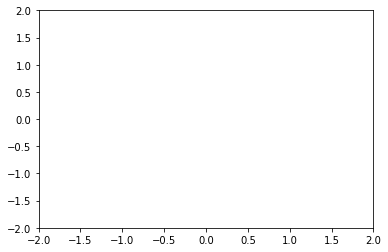

In [5]:
plt.contour(x,y,error,levels=10)

We find that for this test case a single value is reported as the receivers are all at same place(undetermined problem). Now tweaking the ealier code abit so that the receivers are at different positions.

In [6]:
# testing the above function for the case of all the three receivers and the source at a single place

rec_pos = np.zeros(shape =(3,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos[0,:] = [3,0]
rec_pos[1,:] = [0,2]
rec_pos[2,:] = [-1,0]
t_rec_ideal = np.zeros(shape =(3,1))  # ideal value at receivers
t_rec_ideal[:] = np.array([3,2,1]).reshape(3,1)
noise_t = np.random.normal(loc=0.0,scale =2,size = (3,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation


In [7]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc(rec_pos=rec_pos,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]))

Text(0.5, 1.0, 'Contour Plot for error only in time of arrival')

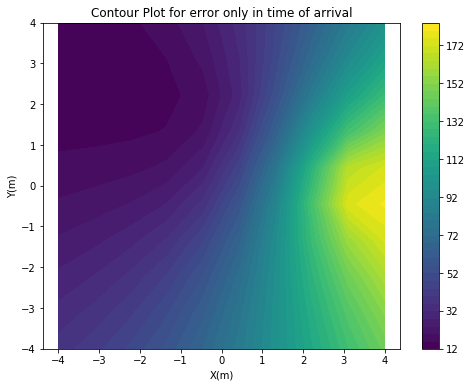

In [8]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Contour Plot for error only in time of arrival')

This result was from a very coarse grid, let us choose a finer grid and see the result. We see that there is quite low value for error around origin which is expected.

In [9]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:40j,-4:4:40j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(40,40))  # To store the values at various points

for i in range(40):
    for j in range(40):
        error[i,j] = src_Loc(rec_pos=rec_pos,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]))

Text(0.5, 1.0, 'Error contour plot for error only in time of arrival')

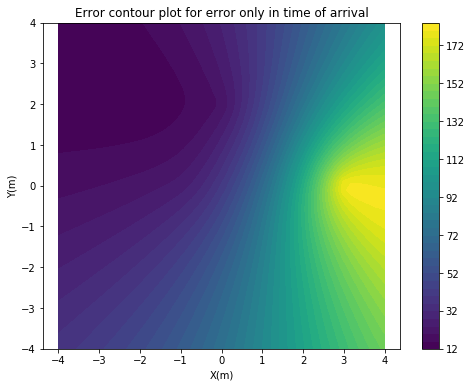

In [10]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour plot for error only in time of arrival')

Nothing much furhter can be said about it. There is still low error reqion around origin. The uncertainity is low along the x axis due to the presence of 2 receivers on this axis. There is only one receiver on y axis and hence greater uncertainity is there in y direction. Let us test it by adding one more receiver in y direction. 

In [11]:
# testing the above function for the case of all the three receivers and the source at a single place

rec_pos = np.zeros(shape =(4,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos[0,:] = [3,0]
rec_pos[1,:] = [0,2]
rec_pos[2,:] = [-1,0]
rec_pos[3,:] = [0,-2]
t_rec_ideal = np.zeros(shape =(4,1))  # ideal value at receivers
t_rec_ideal[:] = np.array([3,2,1,2]).reshape(4,1)
noise_t = np.random.normal(loc=0.0,scale =2,size = (4,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation


In [12]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc(rec_pos=rec_pos,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]))

Text(0.5, 1.0, 'Error contour for error only in time of arrival')

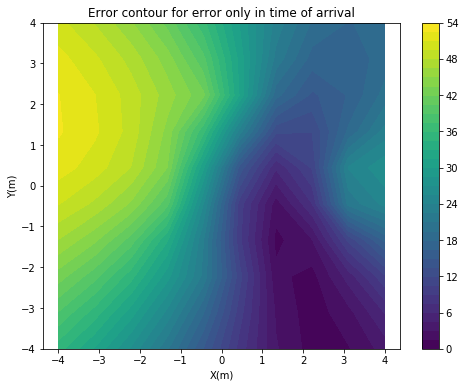

In [13]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for error only in time of arrival')

We see that the innermost contour for low values is quite smaller and much more symmetric than in the previous case. We also note that the towards the reciever with greatest value, the error is higher. 

General comment wrt noise magnitude: Adding noise of magnitude 2 leaves most of the results quite rough. Noise of lower magnitude (0.2 and 0.02) give much clearer picture, however noise reduction from 0.2 to 0.02 didn't give any significant advantage. (Need to test this multiple times, with multiple values.)

#### Adding error in the receiver locations

Implementation of modified algorithm to encounter the error in source receivers.

In [14]:
def src_Loc_recpos_error(rec_pos_mes, t_rec,c,src_pos,rec_pos_act):
    '''The function returns the difference between the position of source(guessed) and receiver location as calculated from 
    measurement of time difference of arrival with the distance calculated from position of source and receiver. We aim to 
    minimise this quantity

    rec_pos_mes = a matrix with  measured position of receivers stored in the following format [[x_1, y_1],[x_2,y_2]]
    (contains error)
    t_rec  = the time of arrival as measured from data
    source_loc = the guessed source location for which the function is being evaluated
    rec_pos_act = the actual receiver position
    
    '''
    
    n_rec = np.shape(rec_pos_mes)[0]
    t_rec_rel1 = np.zeros(shape=(n_rec-1,1))   # time difference calculated wrt the value in first receiver
    
    t_rec_rel1[:] = t_rec[1:] - t_rec[0]     
    
    rec_pos_src_rel = np.zeros(shape =(n_rec-1,2)) # Calculating the relative position of recivers wrt the source
    
    rec_pos_src_rel[:] = rec_pos_mes[1:] -src_pos*np.ones_like(rec_pos_src_rel)  # relative position of receiver 1 wrt the source
    
    rec1_pos_src_rel = rec_pos_mes[0] -src_pos # the position of receiver one wrt the source
    
    rec_dist_src_rel = np.zeros(shape=(n_rec-1,1))
    
    rec1_dist_src_rel = np.sqrt(rec1_pos_src_rel[0]**2 + rec1_pos_src_rel[1]**2)
    
    rec_dist_src_rel[:] = np.sqrt(rec_pos_src_rel[:,0]**2 + rec_pos_src_rel[:,1]**2).reshape(n_rec-1,1)
    
    delta_r = t_rec_rel1*c
    error_rec_pos = np.zeros(shape =(n_rec,2)) # error in position of the receiver
    error_rec_pos[:,:] = rec_pos_mes[:,:] - rec_pos_act[:,:]
    error_rec_dist =np.zeros(shape =(n_rec,1))
    error_rec_dist[:]= np.sqrt(error_rec_pos[:,0]**2 + error_rec_pos[:,1]**2).reshape(n_rec,1)
    error = np.zeros(shape =(n_rec-1,1))   # defing the error to be minimized
    error[:] = delta_r[:] - (rec_dist_src_rel[:]-rec1_dist_src_rel)   
    
    error_to_min =np.dot(error.T,error) +np.dot(error_rec_dist.T,error_rec_dist)# Getting a single value instead of an array
    
    return error_to_min
        

In [15]:
# testing the above function for the case of all the three receivers and the source at a single place

rec_pos_act= np.zeros(shape =(3,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[0,:] = [3,0]
rec_pos_act[1,:] = [0,2]
rec_pos_act[2,:] = [-1,0]
t_rec_ideal = np.zeros(shape =(3,1))  # ideal value at receivers
t_rec_ideal[:] = np.array([3,2,1]).reshape(3,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (3,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (3,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation


In [16]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_act)

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known positon')

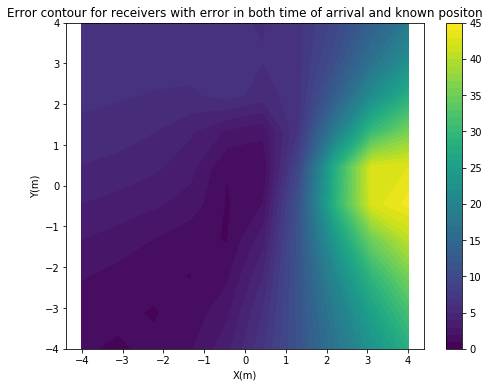

In [17]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known positon')

In [18]:
#Trying a variation of the above function, in which the actual positions of receivers are used in error calculation.

def src_Loc_recpos_error_2(rec_pos_mes, t_rec,c,src_pos,rec_pos_act):
    '''The function returns the difference between the position of source(guessed) and receiver location as calculated from 
    measurement of time difference of arrival with the distance calculated from position of source and receiver. We aim to 
    minimise this quantity

    rec_pos_mes = a matrix with  measured position of receivers stored in the following format [[x_1, y_1],[x_2,y_2]]
    (contains error)
    t_rec  = the time of arrival as measured from data
    source_loc = the guessed source location for which the function is being evaluated
    rec_pos_act = the actual receiver position
    
    '''
    
    n_rec = np.shape(rec_pos_mes)[0]
    t_rec_rel1 = np.zeros(shape=(n_rec-1,1))   # time difference calculated wrt the value in first receiver
    
    t_rec_rel1[:] = t_rec[1:] - t_rec[0]     
    
    rec_pos_src_rel = np.zeros(shape =(n_rec-1,2)) # Calculating the relative position of recivers wrt the source
    
    rec_pos_src_rel[:] = rec_pos_act[1:] -src_pos*np.ones_like(rec_pos_src_rel)  # relative position of receiver 1 wrt the source
    
    rec1_pos_src_rel = rec_pos_act[0] -src_pos # the position of receiver one wrt the source
    
    rec_dist_src_rel = np.zeros(shape=(n_rec-1,1))
    
    rec1_dist_src_rel = np.sqrt(rec1_pos_src_rel[0]**2 + rec1_pos_src_rel[1]**2)
    
    rec_dist_src_rel[:] = np.sqrt(rec_pos_src_rel[:,0]**2 + rec_pos_src_rel[:,1]**2).reshape(n_rec-1,1)
    
    delta_r = t_rec_rel1*c
    error_rec_pos = np.zeros(shape =(n_rec,2)) # error in position of the receiver
    error_rec_pos[:,:] = rec_pos_mes[:,:] - rec_pos_act[:,:]
    error_rec_dist =np.zeros(shape =(n_rec,1))
    error_rec_dist[:]= np.sqrt(error_rec_pos[:,0]**2 + error_rec_pos[:,1]**2).reshape(n_rec,1)
    error = np.zeros(shape =(n_rec-1,1))   # defing the error to be minimized
    error[:] = delta_r[:] - (rec_dist_src_rel[:]-rec1_dist_src_rel)   
    
    error_to_min =np.dot(error.T,error) +np.dot(error_rec_dist.T,error_rec_dist)# Getting a single value instead of an array
    
    return error_to_min
        

In [19]:


rec_pos_act= np.zeros(shape =(3,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[0,:] = [3,0]
rec_pos_act[1,:] = [0,2]
rec_pos_act[2,:] = [-1,0]
t_rec_ideal = np.zeros(shape =(3,1))  # ideal value at receivers
t_rec_ideal[:] = np.array([3,2,1]).reshape(3,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (3,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (3,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation


In [20]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_act)

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

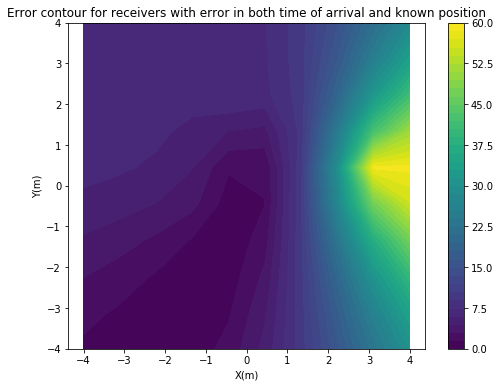

In [21]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Further we will have the following information more about the receivers:

1. The magnitude of received signal. 

2. (Probably) S wave onset. 

The importance is that once we have got certain positions for receivers and some position for source, these additional informations can further help in reducing error in the required quantities. Once we have a sense of receivers' position , we can talk more comfortably about the magnitude. 

However, a point to note here is that we have directly entered the correct position of the receivers which won't be the case in real scenario. In real case, we might have to make some guess for the correct positions and iterate over it. A possible approach in this regard is the following:
The guessed positions for the receivers are true. For the above case, we had measured positions, however we won't be having that. Hence, let us say that a reasonable guess is made based on the time difference of arrival. We can then do computation with these positions, after we have got a value for source,then we proceed with the second part, iterate over a small region around a single receiver and then perform these iterations over other receivers. 

First, let's try to iterate over the same process with random placement of receivers and check the result. Or even before that let's test the method for slightly different position of receiver (other than correct) being fed as the correct value. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

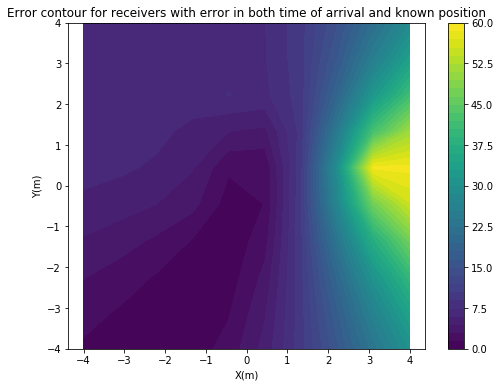

In [22]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [0.2 ,0.2]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

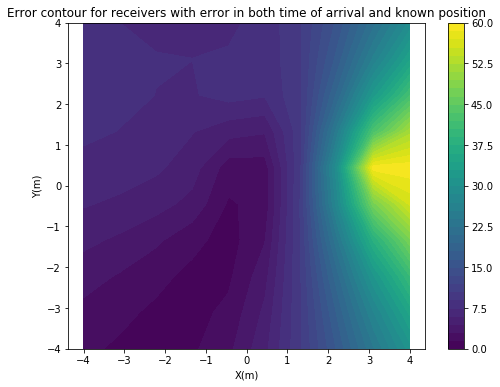

In [23]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [0.4 ,0.4]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

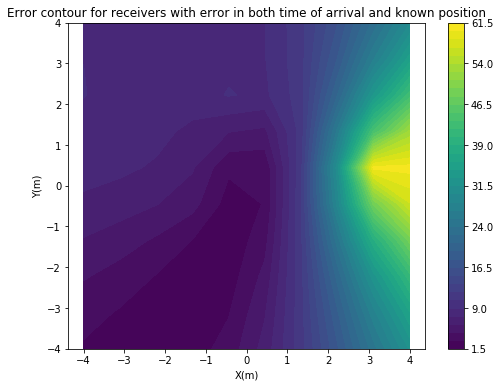

In [24]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [0.6 ,0.6]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

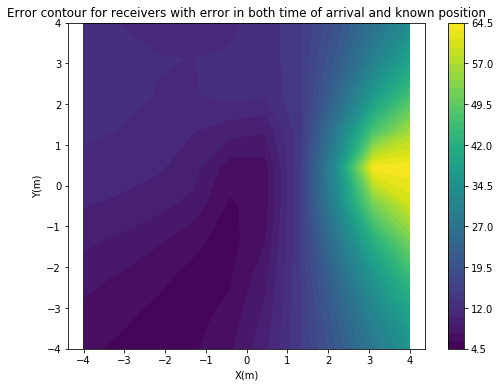

In [25]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [1 ,1]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

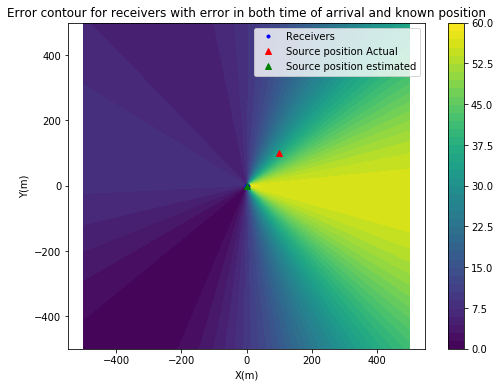

In [26]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

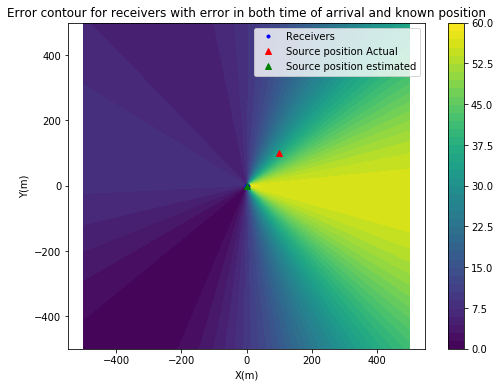

In [27]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Observing the above graphs, it looks like the pattern of error and the overall magnitude is not effected much. Need to check for the correctness. 

We need to figure out a way to carry out iterations in order to improve the accuracy of the method and try to minimize the error in receivers. First, we'll try out with sensors placed in a line with error. Then after observation of error obtained we'll look into methods which can reduce this error or some alternate way of doing it.

https://asp-eurasipjournals.springeropen.com/articles/10.1186/s13634-019-0602-z For reference, it is here.The next thing to implement

In [28]:
# Testing out with 100 receivers placed in a line



rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,0] = np.linspace(start=-100,stop=100,num=101)
rec_pos_act[:,1] = 0                        
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
t_rec_ideal[50:101] = np.linspace(start =0, stop = 100, num=51).reshape(51,1)
t_rec_ideal[0:50] = np.linspace(start =100, stop = 2, num=50).reshape(50,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (101,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation



Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

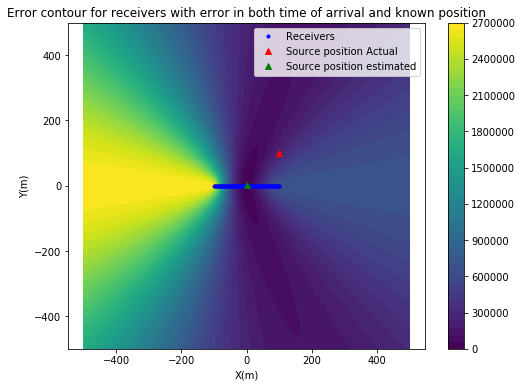

In [29]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

In [30]:
np.min(error)
print(np.where(error == np.min(error)))
print(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))])

(array([500], dtype=int64), array([501], dtype=int64))
[0.5005005] [1.5015015]


We get the source location for min error as (500,501) which is (0,0.2). Quite close to  ther real solution of (0,0).Let's examine the result at a position different that the origin.

In [31]:
# Testing out with 100 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,0] = np.linspace(start=-100,stop=100,num=101)
rec_pos_act[:,1] = 0                        
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
t_rec_ideal[:101] = np.linspace(start =0, stop = 200, num=101).reshape(101,1)
#t_rec_ideal[0:50] = np.linspace(start =100, stop = 2, num=50).reshape(50,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (101,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation



Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

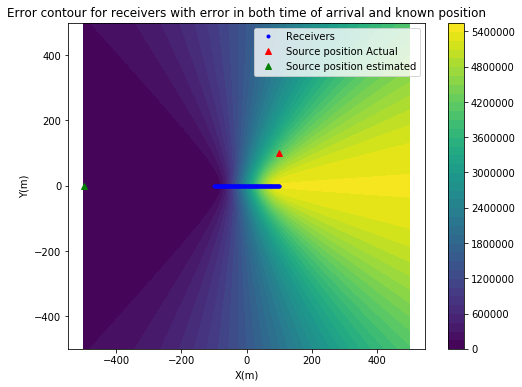

In [32]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

In [33]:
print(x[np.where(error==np.min(error))],y[np.where(error==np.min(error))])

[-500.] [0.5005005]


We see that the calculated value is not much different from the expected one. However, let us try another thing. This time, we'll reverse the placement of source and observe.

In [34]:
# Testing out with 100 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,0] = np.linspace(start=-100,stop=100,num=101)
rec_pos_act[:,1] = 0                        
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
t_rec_ideal[:101] = np.linspace(start =200, stop = 0, num=101).reshape(101,1)
#t_rec_ideal[0:50] = np.linspace(start =100, stop = 2, num=50).reshape(50,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (101,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation



Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

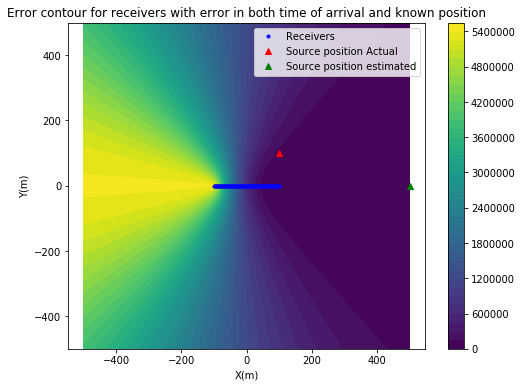

In [35]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

In [36]:
print(x[np.where(error==np.min(error))],y[np.where(error==np.min(error))])

[500.] [-0.5005005]


Interstingly, while the pattern looks just the mirror image of the previous one as it is epxected to be the error encountered here is quite large( expected =(100,0)). 

Note: The above remarks are made in the context of received results for a particular simulation where the results were (-113,1) and (500,1). Since, the program used random number generator to produce error different results may be obtained on different runs. however, so large error as observed in the second case deserves some serious thought and improvement technique if possible. Let's try to get some 5 numbers around the minima and observe.

In [37]:
print(x[np.where(error <=5+np.min(error))],y[np.where(error<=5+np.min(error))])

[ 99.5995996  99.5995996 100.6006006 ... 500.        500.
 500.       ] [-0.5005005   0.5005005  -1.5015015  ... 19.51951952 20.52052052
 21.52152152]


A careful examination of printed sequence clearrly tells that some
terms near the minima are the corect source position. Let's look at it's distribution and find out.

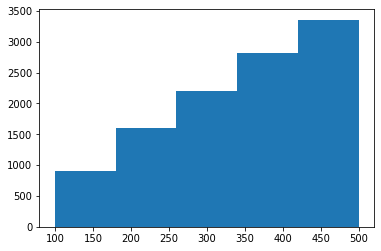

In [38]:
plt.hist(x[np.where(error <=5+np.min(error))],bins=5);

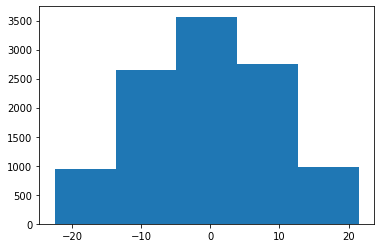

In [39]:
plt.hist(y[np.where(error <=5+np.min(error))],bins=5);

We see that the receivers are aligned along the x axis, still the error observed is greater in x axis and quite tolerable in y axis. Let's now place a receiver at some point in y axis and then examine the results.

In [40]:
# Testing out with 100 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,0] = np.linspace(start=-100,stop=100,num=101)
rec_pos_act[:,1] = 0                        
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
t_rec_ideal[:] = np.sqrt(100**2 + rec_pos_act[0:101,0]**2).reshape(101,1)
#t_rec_ideal[0:50] = np.linspace(start =100, stop = 2, num=50).reshape(50,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (101,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation



Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

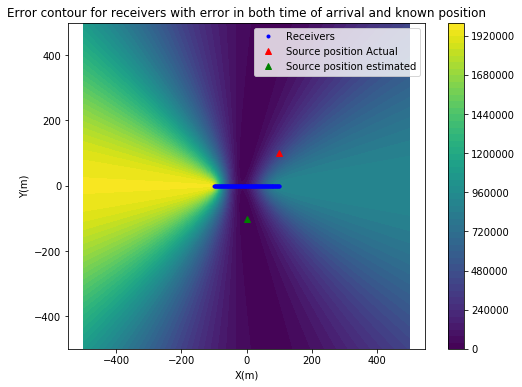

In [41]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

In [42]:
print(x[np.where(error <=5+np.min(error))],y[np.where(error<=5+np.min(error))])

[-0.5005005 -0.5005005 -0.5005005 -0.5005005] [-100.6006006  -99.5995996   99.5995996  100.6006006]


We see that the time reading given in this case was ambiguous(0,100) or(0,-100) both are correct. However, both the cases are covered quite nicely in the above distribution of possible points. We would need some additional information to solve this ambiguity. Let's try to keep receiver at a bit different position in the domain and observe the results.

In [43]:
# Testing out with 100 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,0] = np.linspace(start=-100,stop=100,num=101)
rec_pos_act[:,1] = 0                        
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
t_rec_ideal[:] = np.sqrt(100**2 + (rec_pos_act[0:101,0]-100)**2).reshape(101,1)
#t_rec_ideal[0:50] = np.linspace(start =100, stop = 2, num=50).reshape(50,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (101,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation



Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

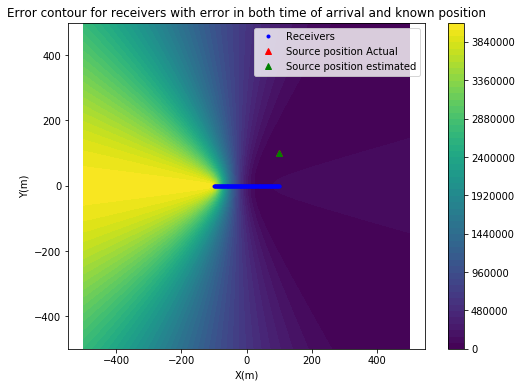

In [44]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

In [45]:
print(x[np.where(error <=5+np.min(error))],y[np.where(error<=5+np.min(error))])

[ 97.5975976  98.5985986  98.5985986  99.5995996  99.5995996 100.6006006
 100.6006006 101.6016016 101.6016016] [  97.5975976  -98.5985986   98.5985986  -99.5995996   99.5995996
 -100.6006006  100.6006006 -101.6016016  101.6016016]


As is clearly visible, the result is quite good for the receivers. Though the value is ambiguous. For reducing ambiguity, a better approach can be to place the receivers on two lines at an angle, this will avoid some symmetry and give better results.

In [46]:
# Testing out with 100 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[50:101,0] = np.linspace(start=0,stop=100,num=51)
rec_pos_act[0:50,0] = np.linspace(start=2,stop=100,num=50)
rec_pos_act[50:101,1] = np.linspace(start=0,stop=100,num=51)
rec_pos_act[0:50,1] = np.linspace(start=2,stop=100,num=50)
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
t_rec_ideal[0:101] = np.sqrt((rec_pos_act[0:101,1]-100)**2 + (rec_pos_act[0:101,0]-100)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (101,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation



Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

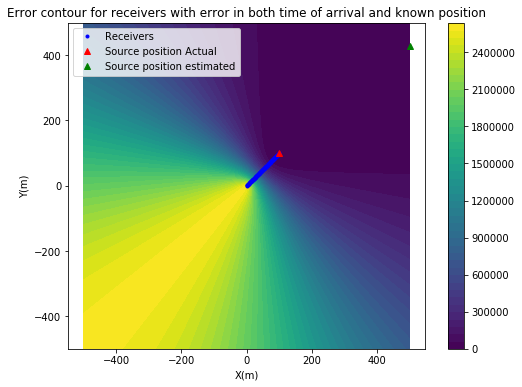

In [47]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

In [48]:
print(x[np.where(error <=5+np.min(error))],y[np.where(error<=5+np.min(error))])

[106.60660661 107.60760761 107.60760761 ... 500.         500.
 500.        ] [114.61461461 115.61561562 116.61661662 ... 457.95795796 458.95895896
 459.95995996]


Since, there are so many value close to the smallest error, we'll see the distribution of it before any conclusion.

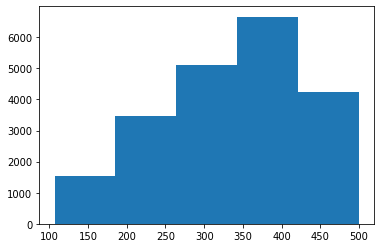

In [49]:
plt.hist(x[np.where(error <=5+np.min(error))],bins=5);

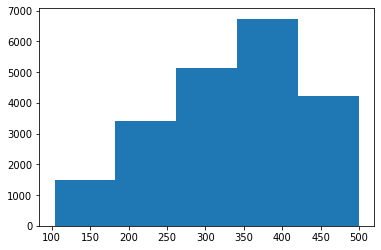

In [50]:
plt.hist(y[np.where(error <=5+np.min(error))],bins=5);

Thus we see that the results are a bit twisted for this pattern of receiver placements. Next, we'll try and work out problem with receiver position in iteration.

A mistake that we might have been making is adding random noises to receiver position and time of receiving independently. A better way to do it could be to first add noise in receiver position, then the time of arrival should be for these positions long withthe additional error. This can be seen easily in the context we are modelling. For baselining the receiever we have a single point, however the time recorded by these receivers is dependent on the position of receiver about that point and not independently and randomly distributed. This we had failed to take into account. Let's try it this way now, first with a line configuration and then with a V configuration. Finally getting to a scenario where a point is only known.

In [51]:
# Testing out with 101 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[50:101,0] = np.linspace(start=0,stop=100,num=51)
rec_pos_act[0:50,0] = np.linspace(start=2,stop=100,num=50)
rec_pos_act[50:101,1] = np.linspace(start=0,stop=10,num=51)
rec_pos_act[0:50,1] = np.linspace(start=2,stop=-10,num=50)
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101] = np.sqrt((rec_pos_mes[0:101,1]-100)**2 + (rec_pos_mes[0:101,0]-100)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation

# Note the different order in which the noises are added this time. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

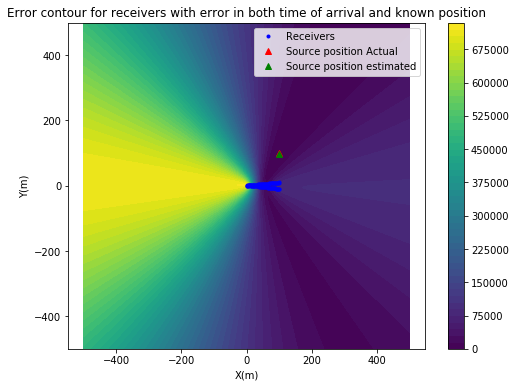

In [52]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Now that we have seen that result is much better this way with same amount of error, we can try to increase the error.

In [53]:
# Testing out with 101 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[50:101,0] = np.linspace(start=0,stop=100,num=51)
rec_pos_act[0:50,0] = np.linspace(start=2,stop=100,num=50)
rec_pos_act[50:101,1] = np.linspace(start=0,stop=10,num=51)
rec_pos_act[0:50,1] = np.linspace(start=2,stop=-10,num=50)
noise_r = np.random.normal(loc=0.0,scale =2,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101] = np.sqrt((rec_pos_mes[0:101,1]-100)**2 + (rec_pos_mes[0:101,0]-100)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =2,size = (101,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation

# Note the different order in which the noises are added this time. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

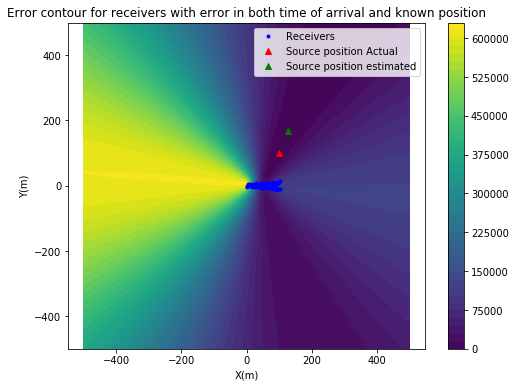

In [54]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

We see that an increase in error by an order of magnitude does not influence the result much and value obtained is quite good.Trying to increase error by another order of magnitude

In [55]:
# Testing out with 101 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[50:101,0] = np.linspace(start=0,stop=100,num=51)
rec_pos_act[0:50,0] = np.linspace(start=2,stop=100,num=50)
rec_pos_act[50:101,1] = np.linspace(start=0,stop=10,num=51)
rec_pos_act[0:50,1] = np.linspace(start=2,stop=-10,num=50)
noise_r = np.random.normal(loc=0.0,scale =20,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101] = np.sqrt((rec_pos_mes[0:101,1]-100)**2 + (rec_pos_mes[0:101,0]-100)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =20,size = (101,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation

# Note the different order in which the noises are added this time. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

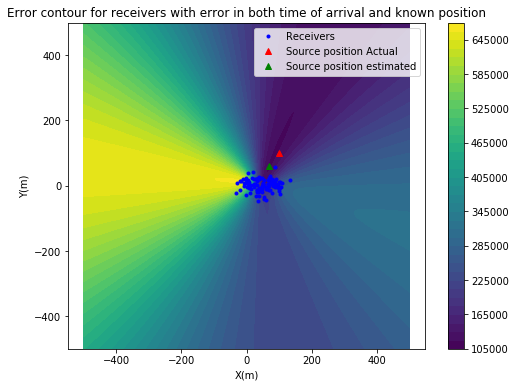

In [56]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Now, the error here is quite large. Let's try to estimate the source location with only reference of a point. And huge error in positions but smaller error in time.   

In [57]:
# Testing out with 101 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,:] = 0 # The deployer is at origin. 
noise_r = np.random.normal(loc=0.0,scale =20,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101] = np.sqrt((rec_pos_mes[0:101,1]-100)**2 + (rec_pos_mes[0:101,0]-100)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation

# Note the different order in which the noises are added this time. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

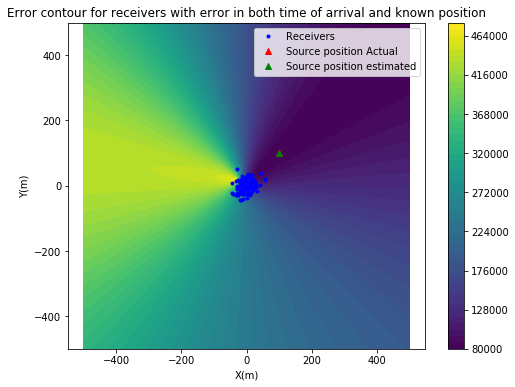

In [58]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

We see that estimation is quite good. Let's try with a higher spread in receiver position

In [59]:
# Testing out with 101 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,:] = 0 # The deployer is at origin. 
noise_r = np.random.normal(loc=0.0,scale =100,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101] = np.sqrt((rec_pos_mes[0:101,1]-100)**2 + (rec_pos_mes[0:101,0]-100)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation

# Note the different order in which the noises are added this time. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

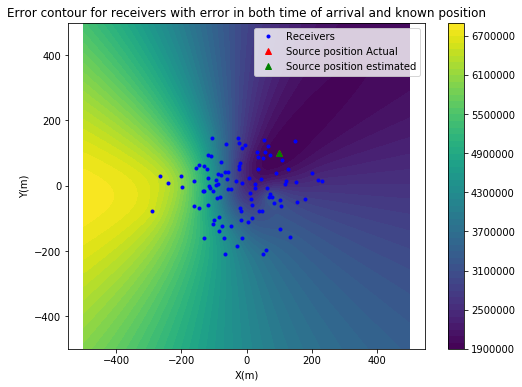

In [60]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

Now it seems that the areal spread has very little effect on the estimation of source position. Let us degrade the resolution of time with greater error being added and then observe the result.

In [61]:
# Testing out with 101 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,:] = 0 # The deployer is at origin. 
noise_r = np.random.normal(loc=0.0,scale =100,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101] = np.sqrt((rec_pos_mes[0:101,1]-100)**2 + (rec_pos_mes[0:101,0]-100)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =2,size = (101,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation

# Note the different order in which the noises are added this time. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

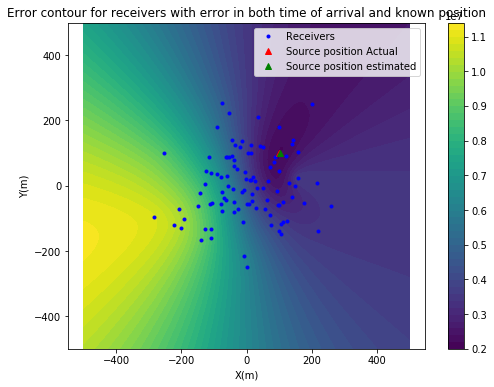

In [62]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

In [63]:
# Testing out with 101 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,:] = 0 # The deployer is at origin. 
noise_r = np.random.normal(loc=0.0,scale =100,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101] = np.sqrt((rec_pos_mes[0:101,1]-100)**2 + (rec_pos_mes[0:101,0]-100)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =20,size = (101,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation

# Note the different order in which the noises are added this time. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

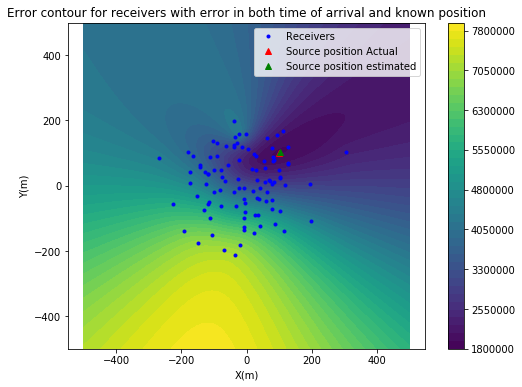

In [64]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

In [65]:
# Testing out with 101 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,:] = 0 # The deployer is at origin. 
noise_r = np.random.normal(loc=0.0,scale =100,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101] = np.sqrt((rec_pos_mes[0:101,1]-100)**2 + (rec_pos_mes[0:101,0]-100)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =50,size = (101,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation

# Note the different order in which the noises are added this time. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

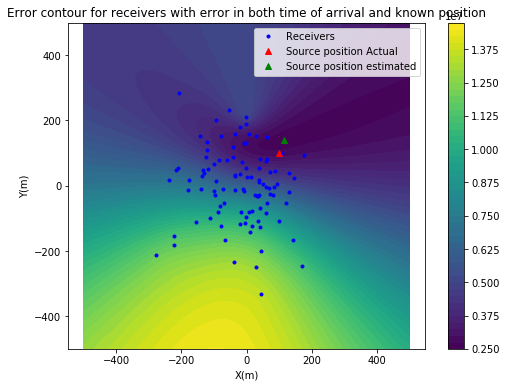

In [66]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(100,100,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

With error in time leading to cause around 25% spread uncertainity. The results seem to deviate a bit. Let's return to good resolution of time axis and displace the source towards the edge of domain to test the applicabilty.

In [67]:
# Testing out with 101 receivers placed in a line

rec_pos_act= np.zeros(shape =(101,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[:,:] = 0 # The deployer is at origin. 
noise_r = np.random.normal(loc=0.0,scale =100,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,1))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101] = np.sqrt((rec_pos_mes[0:101,1]-400)**2 + (rec_pos_mes[0:101,0]-400)**2).reshape(101,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (101,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation

# Note the different order in which the noises are added this time. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

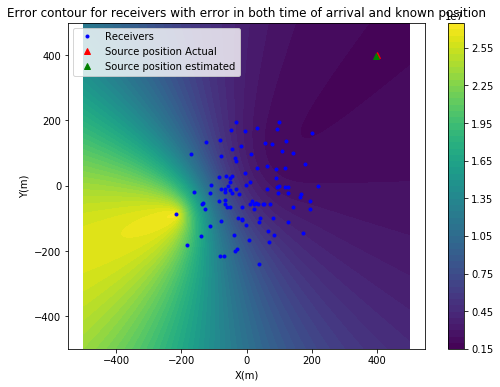

In [68]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(400,400,'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')